## 1 Decision Tree
https://scs.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=257476ca-e66a-4cdb-9ffc-8abdd3129954  
- Decision tree classify data by sorting them down the tree from the root to some leaf node which provides the classification/regression  
- Each node in the tree specifies a test of some predictor and each branch descending from that node corresponds to one of the possible values for that predictor

  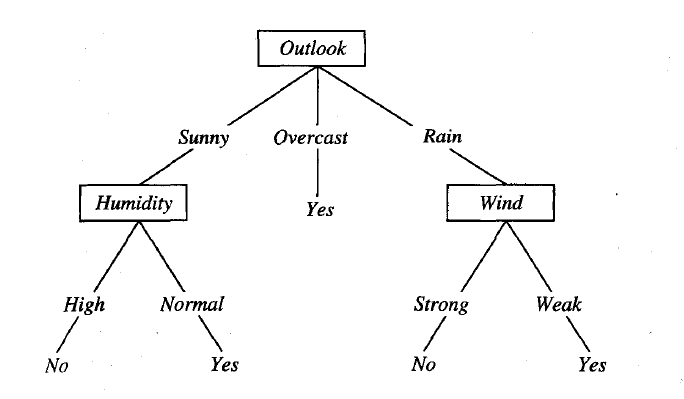


- Based on above tree what is the decision when (Outlook = Sunny, Temperature = Hot, Humidity = High, Wind = Strong) ?
- Tree has root, nodes (internal and terminal/leaf node), branches
- Decision tree is inverted tree i.e. leafs are down and root is at the top
- Works with both classification and regression problems
- Can capture non-linear patterns   

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'PlayTennis.csv')
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [2]:
df['Play_Tennis'].value_counts()

Play_Tennis
Yes    9
No     5
Name: count, dtype: int64

ID3 version of decision tree


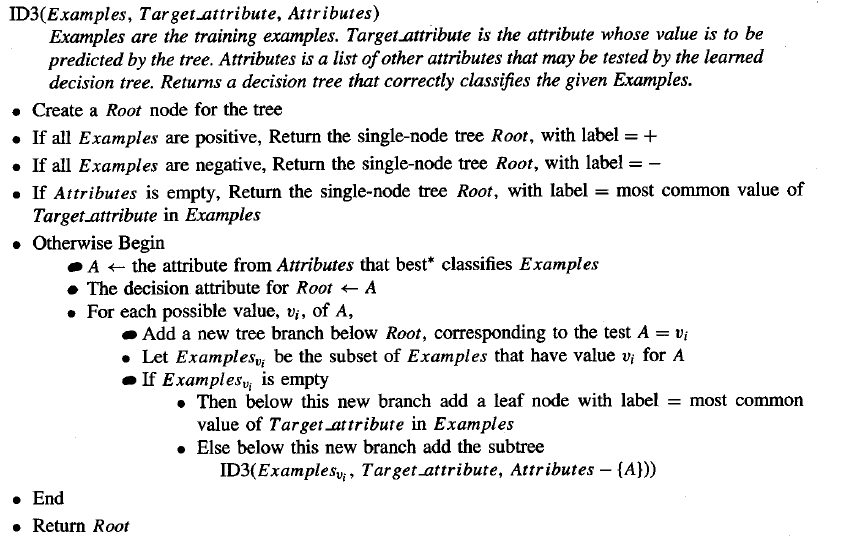   



## 1.1 Best predictor for classification   
- A good predictor is the one which that is most useful in classifying examples
- The attribute that has highest value of `information gain` is used in ID3 variant of decision tree
- For a collection S having 2 classes with proportion p for +ve class and 1-p for -ve class </br>
  $Entropy (S) = -p log_2(p) - (1-p) log_2(1-p)$


In [3]:
## Entropy for above data  
p = 9/ 14
S = -p * np.log2(p) - (1 - p) * np.log2(1-p)
print(S)

0.9402859586706311


In [4]:
## What is entropy when 1. all examples are of one class? 2. same number of examples in each class (i.e. p = .5)? 0 * log 0 = 0

C:\Users\dubey\AppData\Local\Temp\ipykernel_9748\2452055114.py:2: RuntimeWarning: divide by zero encountered in log2
  S = -p * np.log2(p) - (1 - p) * np.log2(1-p)
C:\Users\dubey\AppData\Local\Temp\ipykernel_9748\2452055114.py:2: RuntimeWarning: invalid value encountered in multiply
  S = -p * np.log2(p) - (1 - p) * np.log2(1-p)


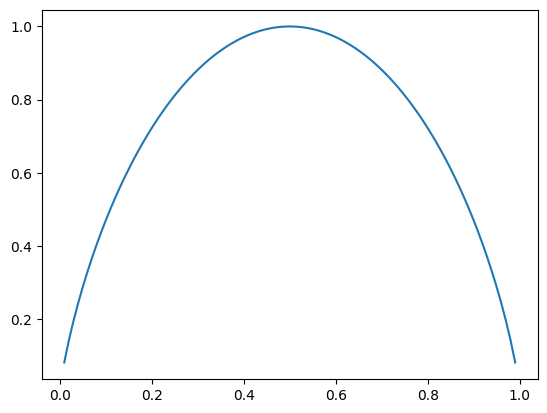

In [5]:
p = np.linspace(0, 1, 100)
S = -p * np.log2(p) - (1 - p) * np.log2(1-p)
import matplotlib.pyplot as plt
plt.plot(p, S)
plt.show()

- Information gain if the number of classes are k </br>
$Entropy (S) = \sum_{i = 1}^{k} -p_ilog_2p_i$
- Information gain measure measures the expected reduction in entropy </br>
  $Gain(S, X) = Entropy (S) - \sum_{v \in Values (X)}\frac{|S_v|}{|S|}Entropy(S_v)$
- Values (X) is the set of all possible values of the predictor X
- |S| is the number of records in S and $|S_v|$ is the number of records in the set when X takes value `v`  


In [7]:
## Calculate information gain Gain(S, Wind)
## Wind = Weak, Strong
print(df['Wind'].value_counts())
print(pd.crosstab(df['Play_Tennis'], df['Wind']))
## Wind = Weak = 8, Strong = 6)

p = 9/ 14
S = -p * np.log2(p) - (1 - p) * np.log2(1-p)
p_weak = 6/8
S_weak = - p_weak * np.log2(p_weak) - (1-p_weak) * np.log2(1- p_weak)
p_strong = 3/6
S_strong = - p_strong * np.log2(p_strong) - (1-p_strong) * np.log2(1- p_strong)
print(S_strong, S_weak)

info_gain = S - 8/14 * S_weak - 6/14 * S_strong
print(info_gain)

Wind
Weak      8
Strong    6
Name: count, dtype: int64
Wind         Strong  Weak
Play_Tennis              
No                3     2
Yes               3     6
1.0 0.8112781244591328
0.048127030408269544


In [8]:
## Calcualte the information Gain(S, Humidity)
## Humidity = High, Normal
## High = 7, Normal = 7
print(pd.crosstab(df['Play_Tennis'], df['Humidity']))
p_high = 3/7
S_high = - p_high * np.log2(p_high) - (1-p_high) * np.log2(1- p_high)
p_normal = 6/7
S_normal = - p_normal * np.log2(p_normal) - (1-p_normal) * np.log2(1- p_normal)
print(S_high, S_normal)
info_gain = S - 7/14 * S_high - 7/14 * S_normal
print(info_gain)

Humidity     High  Normal
Play_Tennis              
No              4       1
Yes             3       6
0.9852281360342515 0.5916727785823275
0.15183550136234164


Gain(S, Outlook) = 0.246 </br>
Gain(S, Humidity) = 0.151 </br>
Gain(S, Wind) = 0.048 </br>
Gain(S, Temperature) = 0.029

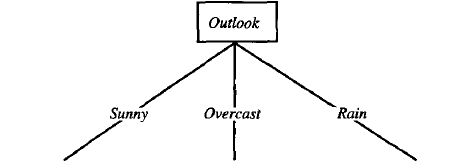  
Which attribute should come next in the left most side

In [9]:
df = df.loc[df['Outlook'] == 'Sunny']
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
10,D11,Sunny,Mild,Normal,Strong,Yes


In [10]:
def entropy(p):
    if p == 0:
        return 0
    elif p == 1:
        return 0
    return -p*np.log2(p) - (1-p)*np.log2(1- p)

In [14]:
p = 2/5
S = entropy(p)
print(S)

0.9709505944546686


In [15]:
info_gain_temp = S - 2/5 * entropy(0/2) - 2/5* entropy(1/2) - 1/5 * entropy(1/1)
info_gain_temp

0.5709505944546686

In [16]:
info_gain_humid = S - 3/5 * entropy(0/3) - 2/5*entropy(2/2)
info_gain_humid

0.9709505944546686

In [17]:
info_gain_wind = S - 3/5 * entropy(1/3) - 2/5*entropy(1/2)
info_gain_wind

0.01997309402197489

## 1.2 Advantages and Disadvantages of Trees  
- Trees are very easy to explain to people
- Some people believe that decision trees more closely mirror human decision-making than do the regression and classification approaches
- Trees can be displayed graphically, and are easily interpreted even by a non-expert
- Trees can easily handle qualitative predictors without the need to create dummy variables
- Unfortunately, trees generally do not have the same level of predictive accuracy as some of the other regression and classification approaches
- Additionally, trees can be very non-robust. In other words, a small change in the data can cause a large change in the final estimated tree

## 2 Bagging  
- Bootstrap + Averaging
- Decision tree has high variance
- `Bagging` is a general purpose procedure for reducing the variance of a statistical learning method
- Given a set of n independent observations $Z_1$, . . . ,$Z_n$, each with variance $σ^2$, the variance of the mean $\overline{Z}$ of the observations is given by $σ^2/n$ </br>
    Averaging a set of observation reduces variance
- Approach - For b = 1, 2, ..., B   
     > i. Generate a bootstrap samples from training data </br>
     > ii. We train our model on $b^{th}$ training set in order to get $\hat{f}^b(x)$
- $\hat{f}_{bag}(x) = \frac{1}{B}\sum_{b=1}^{B}\hat{f}^b(x)$
- How B predictions are accumulated in case of classification model?
- How to choose B?

### 2.1 Out of Bag (OOB) Error Estimation 
- With bagging approach, there is an easier way to estimate test error without doing cross-validation or validation set approach
- In a bootstrap sample around 2/3 of the training data gets selected and 1/3 is left out
- The remaining one-third of the observations not used to fit a given bagged tree are referred to as the `out-of-bag` (OOB) observations
- We can predict the response for the $i^{th}$ observation using each of the trees in which that observation was OOB
- This will yeild around B/3 prediction for the $i^{th}$ observation, we can average these predicted response (or majority vote for classification)
- This leads to a single OOB prediction for $i^{th}$ observation
- The resulting OOB error is a valid estimate of the test error for the bagged model, since the response for each observation is predicted using only the trees that were not fit using that observation

### 2.2 Random Forests   


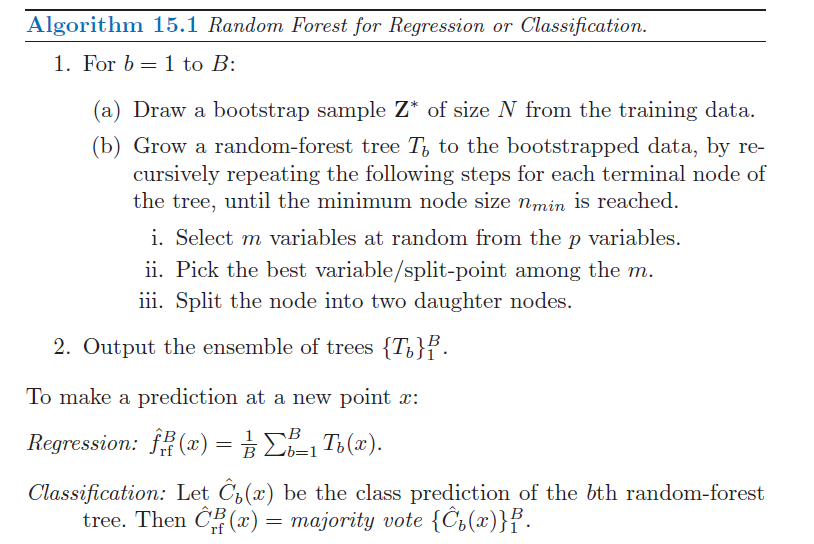

- Typically m is choosen as $\sqrt(p)$
- Why is it good to discard most of the predictors?
- Averaging many highly correlated quantities does not lead to as large of a reduction in variance as averaging many uncorrelated quantities
- The process of selecting m predictors randomnly helps in `decorrelating` the trees.
- What's the difference between bagging & random forest?